In [101]:
import csv

import pandas as pd

gpqa_maj_df = pd.read_csv(
    "../data/gpqa_w_numerical and_nominal_maj_complexity.tsv",
    sep="\t",
    header=0,
    quoting=csv.QUOTE_NONE,
    quotechar="",
    escapechar="\\",
)

print(gpqa_maj_df.value_counts("subject"))

gpqa_maj_df.head()

subject
Physics      187
Chemistry    183
Biology       78
Name: count, dtype: int64


,question,correct,incorrect1,incorrect2,incorrect3,explanation,topic,subject,difficulty,masj_num_complexity,masj_num_rating,masj_nominal_complexity,masj_nominal_rating
0,"A large gene has dozens of exons, of which the...",R-loops,lariat,poly(A) tail,antisense,The text describes the dystrophin gene and the...,Molecular Biology,Biology,Hard undergraduate level (could be a question ...,0.83,10,undergraduate,8
1,Two quantum states with energies E1 and E2 hav...,10^-4 ev,10^-8 ev,10^-9 ev,10^-11 ev,"According to uncertainty principle, Delta E* D...",Physics (general),Physics,Hard undergraduate level (could be a question ...,0.50,10,undergraduate,10
2,trans-cinnamaldehyde was treated with methylma...,11,10,12,14,\ntrans-cinnamaldehyde was treated with methyl...,Organic Chemistry,Chemistry,Hard graduate level (could be a question on a ...,0.65,9,postgraduate,9
3,how many of the following compounds exhibit op...,4,3,5,6,the compounds\n1-methyl-4-(prop-1-en-2-yl)cycl...,Organic Chemistry,Chemistry,Hard undergraduate level (could be a question ...,0.65,9,undergraduate,9
4,A coating is applied to a substrate resulting ...,124°,129°,134°,139°,"In the Cassie-Baxter state, droplets are in co...",Chemistry (general),Chemistry,Hard undergraduate level (could be a question ...,0.70,9,undergraduate,8


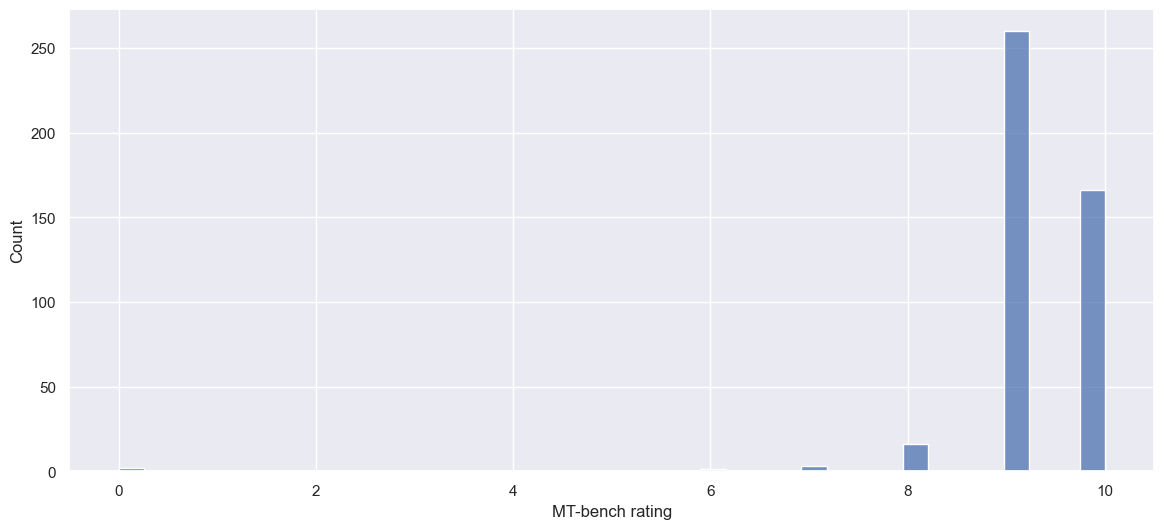

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    gpqa_maj_df,
    x="masj_num_rating",
)
ax.set_xlabel("MT-bench rating")
ax.set_ylabel("Count")
plt.show()

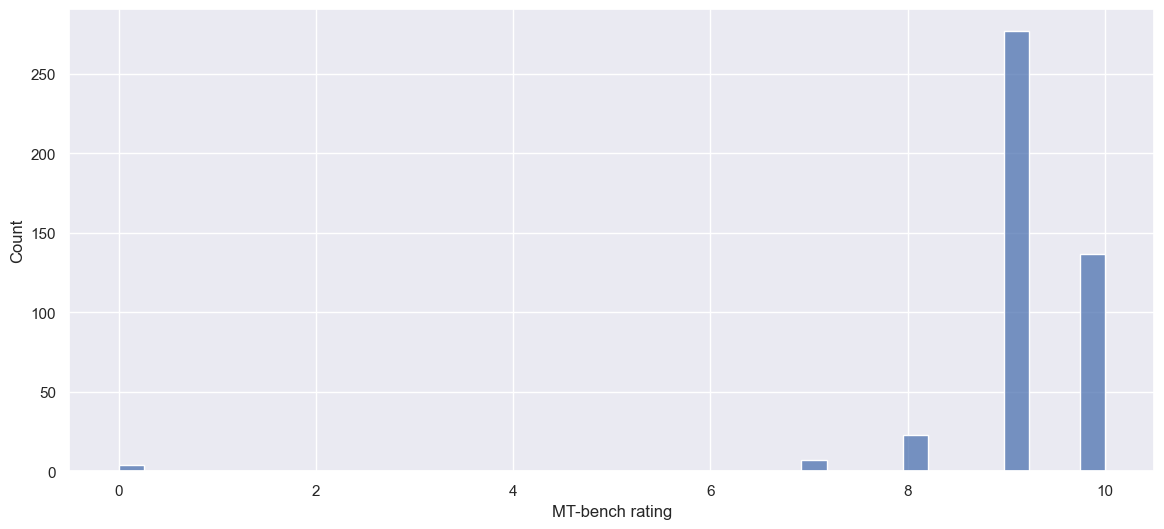

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    gpqa_maj_df,
    x="masj_nominal_rating",
)
ax.set_xlabel("MT-bench rating")
ax.set_ylabel("Count")
plt.show()

In [104]:
print(gpqa_maj_df.describe())
gpqa_maj_df = gpqa_maj_df[gpqa_maj_df["masj_num_rating"] >= 9]
print(gpqa_maj_df.describe())
gpqa_maj_df = gpqa_maj_df[gpqa_maj_df["masj_nominal_rating"] >= 9]
print(gpqa_maj_df.describe())
gpqa_maj_df = gpqa_maj_df[gpqa_maj_df["masj_num_complexity"] >= 0]
print(gpqa_maj_df.describe())
gpqa_maj_df = gpqa_maj_df[gpqa_maj_df["masj_nominal_complexity"] != ""]
print(gpqa_maj_df.describe())

       masj_num_complexity  masj_num_rating  masj_nominal_rating
count           448.000000       448.000000           448.000000
mean              0.637746         9.274554             9.142857
std               0.084697         0.860817             1.060641
min               0.400000         0.000000             0.000000
25%               0.550000         9.000000             9.000000
50%               0.650000         9.000000             9.000000
75%               0.700000        10.000000            10.000000
max               0.950000        10.000000            10.000000
       masj_num_complexity  masj_num_rating  masj_nominal_rating
count           426.000000       426.000000           426.000000
mean              0.638803         9.389671             9.140845
std               0.084298         0.488249             1.079814
min               0.450000         9.000000             0.000000
25%               0.550000         9.000000             9.000000
50%               0.65000

In [105]:
from matplotlib import pyplot as plt

normalized_gpqa = gpqa_maj_df[["difficulty", "masj_nominal_complexity", "masj_num_complexity"]].copy(deep=True)

print(normalized_gpqa.value_counts("difficulty", dropna=False))

normalized_gpqa.replace(
    {
        "difficulty": {
            "Easy undergraduate level (or easier)": 1,
            "Hard undergraduate level (could be a question on a hard undergraduate exam for students majoring in the subject)": 2,
            "Hard graduate level (could be a question on a hard graduate exam for PhD students in the domain)": 3,
            "Post-graduate level or harder (only individuals with years of highly specialized expertise could reliably answer correctly)": 4,
        }
    },
    inplace=True,
)
print(normalized_gpqa.value_counts("difficulty", dropna=False))

print(normalized_gpqa.value_counts("masj_nominal_complexity", dropna=False))

normalized_gpqa.replace(
    {
        "masj_nominal_complexity": {
            "high_school": 1,
            "undergraduate": 2,
            "postgraduate": 3,
            "phd": 4,
        }
    },
    inplace=True,
)
print(normalized_gpqa.value_counts("masj_nominal_complexity", dropna=False))

normalized_gpqa.dropna(inplace=True)
print(normalized_gpqa.describe())


difficulty
Hard undergraduate level (could be a question on a hard undergraduate exam for students majoring in the subject)               215
Hard graduate level (could be a question on a hard graduate exam for PhD students in the domain)                               134
Post-graduate level or harder (only individuals with years of highly specialized expertise could reliably answer correctly)     35
NaN                                                                                                                              7
Easy undergraduate level (or easier)                                                                                             3
Name: count, dtype: int64
difficulty
2.0    215
3.0    134
4.0     35
NaN      7
1.0      3
Name: count, dtype: int64
masj_nominal_complexity
undergraduate    295
postgraduate      86
high_school        8
phd                3
NaN                2
Name: count, dtype: int64
masj_nominal_complexity
2.0    295
3.0     86
1.0      8
4.0 

/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_20931/2989482609.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  normalized_gpqa.replace(
/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_20931/2989482609.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  normalized_gpqa.replace(


In [106]:
print(normalized_gpqa.value_counts(["difficulty", "masj_nominal_complexity"]))

print("\n\nMatching complexity")
print(
    normalized_gpqa[normalized_gpqa["difficulty"] == normalized_gpqa["masj_nominal_complexity"]].value_counts(
        ["difficulty", "masj_nominal_complexity"]
    )
)

print("\n\nDifferent complexity")
print(
    normalized_gpqa[normalized_gpqa["difficulty"] != normalized_gpqa["masj_nominal_complexity"]].value_counts(
        ["difficulty", "masj_nominal_complexity"]
    )
)

difficulty  masj_nominal_complexity
2.0         2.0                        173
3.0         2.0                         93
            3.0                         38
2.0         3.0                         35
4.0         2.0                         22
            3.0                         11
2.0         1.0                          6
1.0         2.0                          3
4.0         4.0                          2
2.0         4.0                          1
3.0         1.0                          1
Name: count, dtype: int64


Matching complexity
difficulty  masj_nominal_complexity
2.0         2.0                        173
3.0         3.0                         38
4.0         4.0                          2
Name: count, dtype: int64


Different complexity
difficulty  masj_nominal_complexity
3.0         2.0                        93
2.0         3.0                        35
4.0         2.0                        22
            3.0                        11
2.0         1.0          

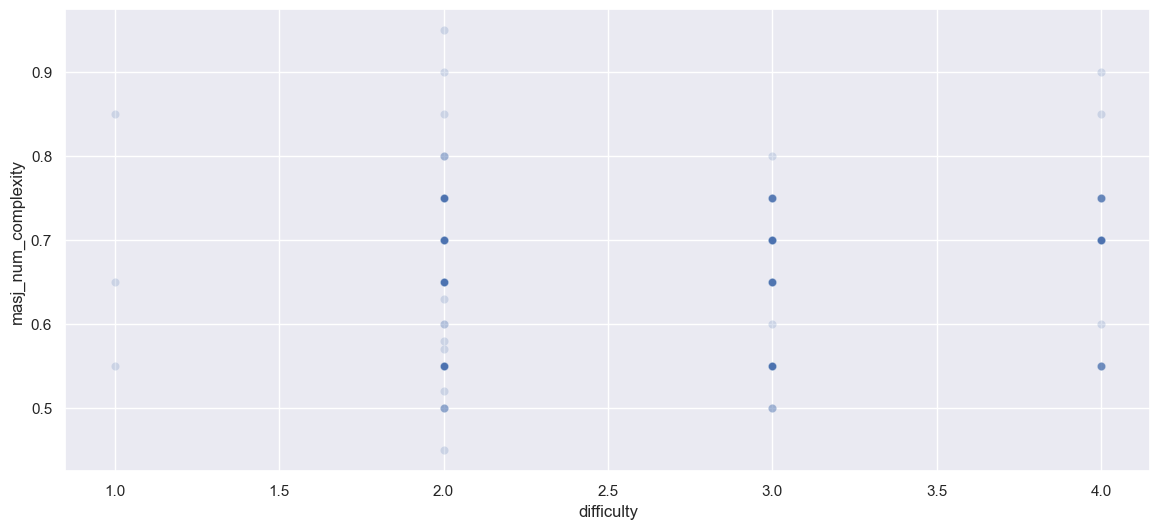

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
sns.scatterplot(normalized_gpqa, x="difficulty", y="masj_num_complexity", alpha=0.2)
plt.show()

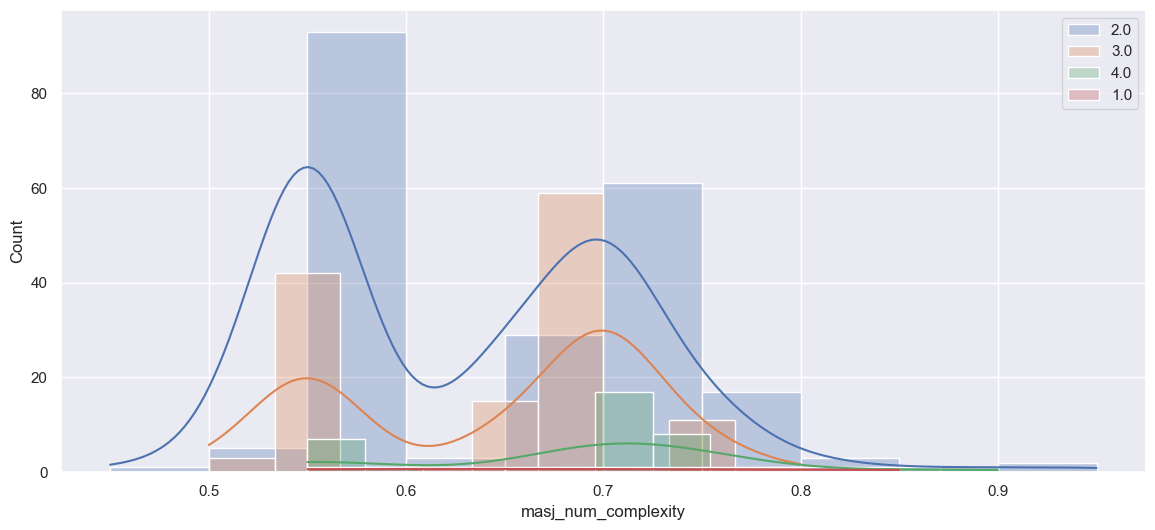

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))

for difficulty in normalized_gpqa["difficulty"].unique():
    sns.histplot(
        normalized_gpqa[normalized_gpqa["difficulty"] == difficulty],
        x="masj_num_complexity",
        label=difficulty,
        kde=True,
        alpha=0.3,
    )
plt.legend()
plt.show()